In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model_name = ['Gemma 2b','phi3.5 INT4', 'phi3.5 INT8', 'Qwen 0.5b', 'Qwen 1.5b', 'Qwen 3b int8']

In [ ]:
time_init = pd.read_csv('/gdrive/MyDrive/Tesi_magistrale/inference_time/time_initialization.csv')
time_init

,model_name,initialization_time
0,gemma_2b,164.971127
1,phi3.5_mini_int4,7.825500
2,phi3.5_mini_int8,2.729343
3,qwen_0.5b,2.325696
4,qwen_1.5b,19.791630
5,qwen_3b_int8,5.039004


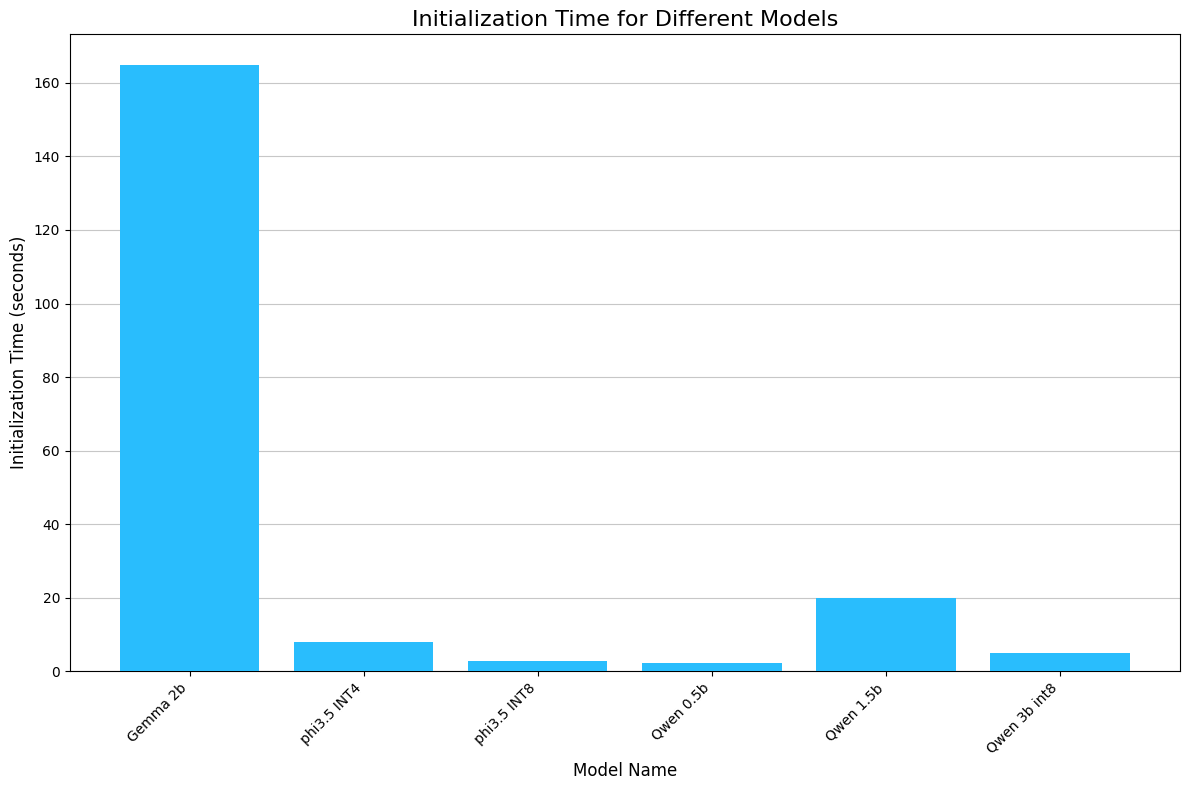

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(model_name, time_init['initialization_time'], color='#29bdfd', zorder=3)
plt.grid(axis='y', alpha=0.7, zorder=0)  # La griglia con zorder più basso
plt.xlabel("Model Name", fontsize=12)
plt.ylabel("Initialization Time (seconds)", fontsize=12)
plt.title("Initialization Time for Different Models", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('different_initialization_time.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [ ]:
file_dict = {
    'Gemma 2 2b': '/gdrive/MyDrive/Tesi_magistrale/inference_time/gemma_time_inference_new.csv',
    'phi3.5 INT4': '/gdrive/MyDrive/Tesi_magistrale/inference_time/phi_int4_time_inference.csv',
    'phi3.5 INT8': '/gdrive/MyDrive/Tesi_magistrale/inference_time/phi_int8_time_inference.csv',
    'Qwen 0.5b': '/gdrive/MyDrive/Tesi_magistrale/inference_time/qwen_0.5b_time_inference.csv',
    'Qwen 1.5b': '/gdrive/MyDrive/Tesi_magistrale/inference_time/qwen_1.5b_time_inference.csv',
    'Qwen 3b int8': '/gdrive/MyDrive/Tesi_magistrale/inference_time/qwen_3b_time_inference.csv'
}

In [ ]:

# # Loop through each file in the dictionary
# for model_name, file_path in file_dict.items():
#     # Load the CSV file
#     data = pd.read_csv(file_path)

#     # Rename the column from 0 to 'inference_time'
#     data.columns = ['inference_time']

#     # Save the file back with the updated column name
#     data.to_csv(file_path, index=False)

#     print(f"Updated column name for {model_name} and saved to {file_path}")


Updated column name for gemma_2b and saved to /gdrive/MyDrive/Tesi_magistrale/inference_time/gemma_time_inference.csv
Updated column name for phi3.5_mini_int4 and saved to /gdrive/MyDrive/Tesi_magistrale/inference_time/phi_int4_time_inference.csv
Updated column name for phi3.5_mini_int8 and saved to /gdrive/MyDrive/Tesi_magistrale/inference_time/phi_int8_time_inference.csv
Updated column name for qwen_0.5b and saved to /gdrive/MyDrive/Tesi_magistrale/inference_time/qwen_0.5b_time_inference.csv
Updated column name for qwen_1.5b and saved to /gdrive/MyDrive/Tesi_magistrale/inference_time/qwen_1.5b_time_inference.csv
Updated column name for qwen_3b_int8 and saved to /gdrive/MyDrive/Tesi_magistrale/inference_time/qwen_3b_time_inference.csv


In [ ]:
df_gemma = pd.read_csv(file_dict['Gemma 2 2b'])
df_gemma

,inference_time
0,128.801136
1,58.145977
2,61.467618
3,39.063751
4,62.230185
5,58.216303
6,40.471259
7,27.498546
8,58.518343
9,16.196861


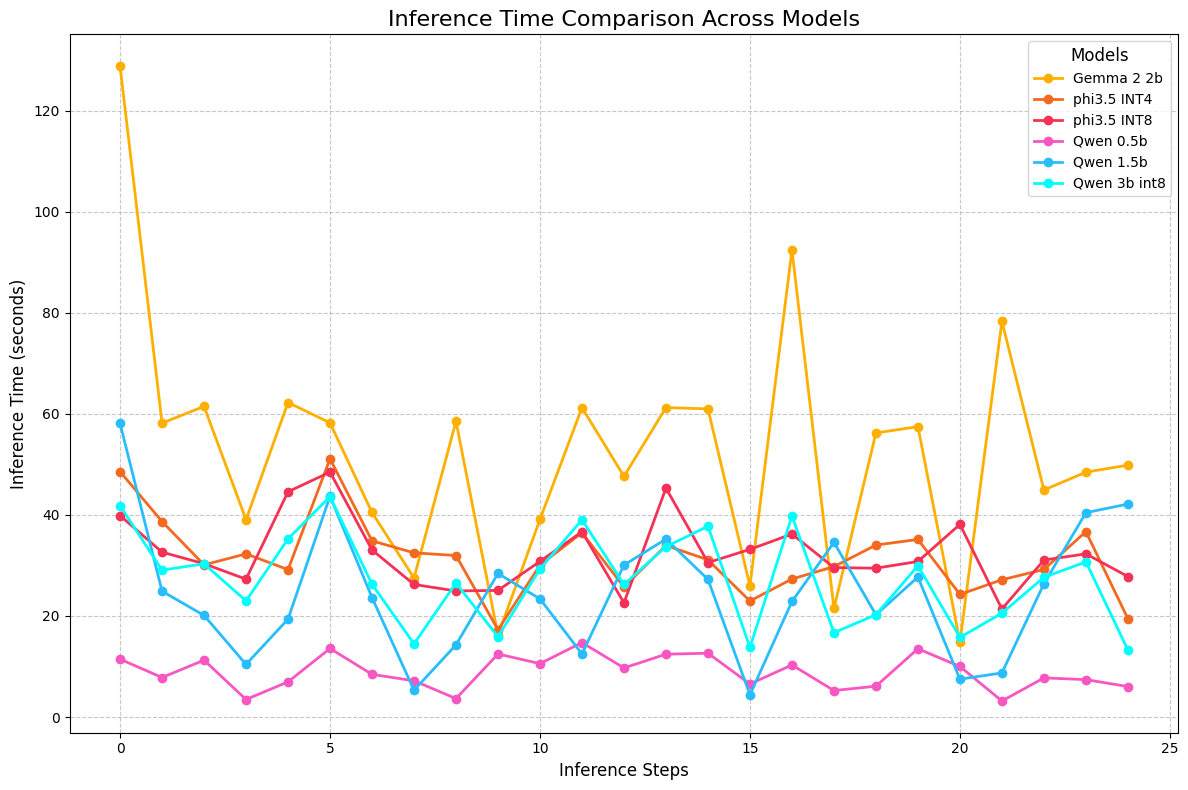

In [ ]:
# Lista di colori da utilizzare
new_colors = ['#FFAF00', '#F46920', '#F53255', '#F857C1', '#29BDFD', '#00FFFF']  # Palette personalizzata

# Initialize a plot
plt.figure(figsize=(12, 8))

# Load each file and plot inference time with model name as label
for (model_name, file_path), color in zip(file_dict.items(), new_colors):
    # Load the file, treating the first unnamed column as inference time
    data = pd.read_csv(file_path)
    # Plot inference time with the model name as label
    plt.plot(data['inference_time'], label=model_name, linewidth=2, marker='o', color=color)

# Set plot labels and title
plt.xlabel("Inference Steps", fontsize=12)
plt.ylabel("Inference Time (seconds)", fontsize=12)
plt.title("Inference Time Comparison Across Models", fontsize=16)
# Add gridlines for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the legend for better readability
plt.legend(title="Models", fontsize='medium', title_fontsize='large', loc='upper right')
plt.tight_layout()
plt.savefig('Inference_time_comparison_across_model.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()


In [ ]:
mean_time = {}
for model_name, file_path in file_dict.items():
  df = pd.read_csv(file_path)
  mean_time[model_name] = df['inference_time'].mean()

mean_times_df = pd.DataFrame(list(mean_time.items()), columns=["Model", "Mean Time (seconds)"])
mean_times_df

,Model,Mean Time (seconds)
0,Gemma 2 2b,52.424400
1,phi3.5 INT4,31.589891
2,phi3.5 INT8,32.326372
3,Qwen 0.5b,8.895066
4,Qwen 1.5b,24.459020
5,Qwen 3b int8,27.221266


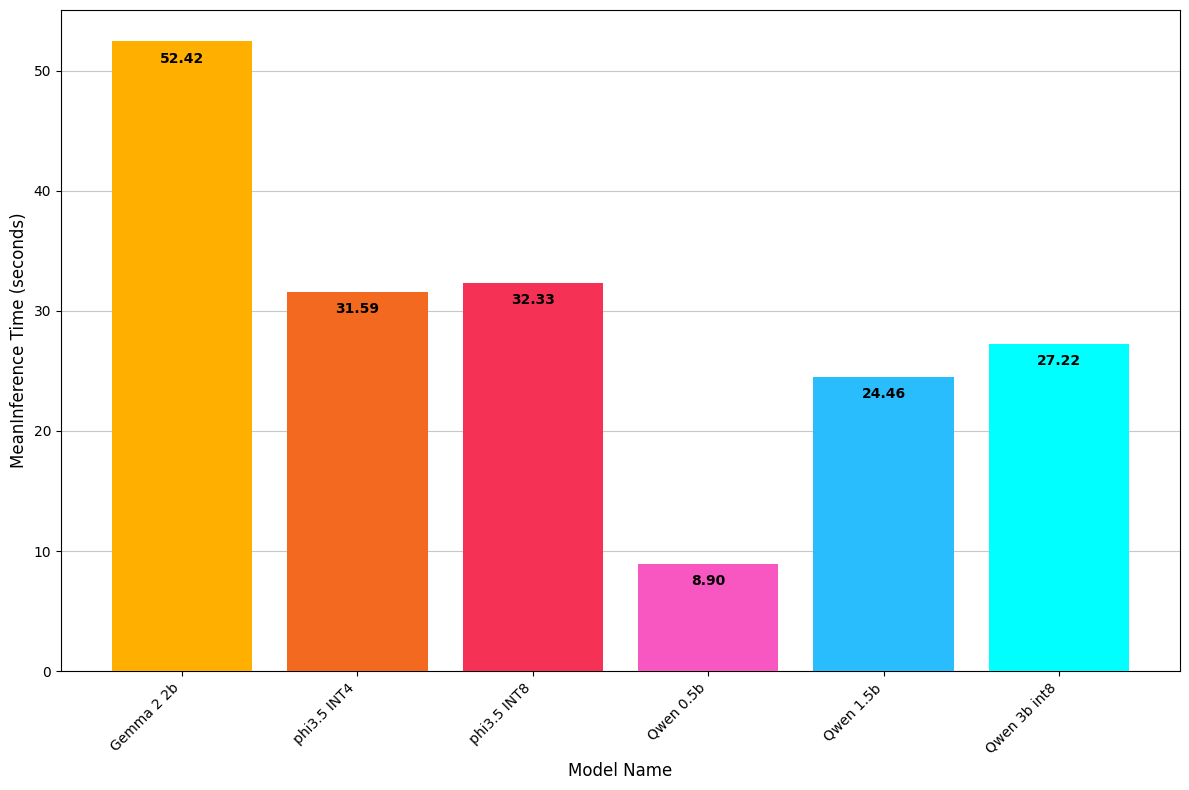

In [ ]:
new_colors = ['#FFAF00', '#F46920', '#F53255', '#F857C1', '#29BDFD', '#00FFFF']  # Palette personalizzata

plt.figure(figsize=(12, 8))
bars = plt.bar(mean_times_df['Model'], mean_times_df['Mean Time (seconds)'], color=new_colors, zorder=3)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height - 2,
        f"{height:.2f}",
        ha='center',
        va='bottom',
        color='black',
        fontsize=10,
        weight='bold'
    )
plt.grid(axis='y', alpha=0.7, zorder=0)  # La griglia con zorder più basso
plt.xlabel("Model Name", fontsize=12)
plt.ylabel("MeanInference Time (seconds)", fontsize=12)
plt.title("Mean Inference Time for Different Models", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('mean_time_inference_on_cpu.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [ ]:
from google.colab import files
files.download('Inference_time_comparison_across_model.png')
#files.download('different_initialization_time.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('mean_time_inference_on_cpu.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/gdrive/MyDrive/Tesi_magistrale/inference_time/gemma_time_inference.csv
Index(['inference_time'], dtype='object')


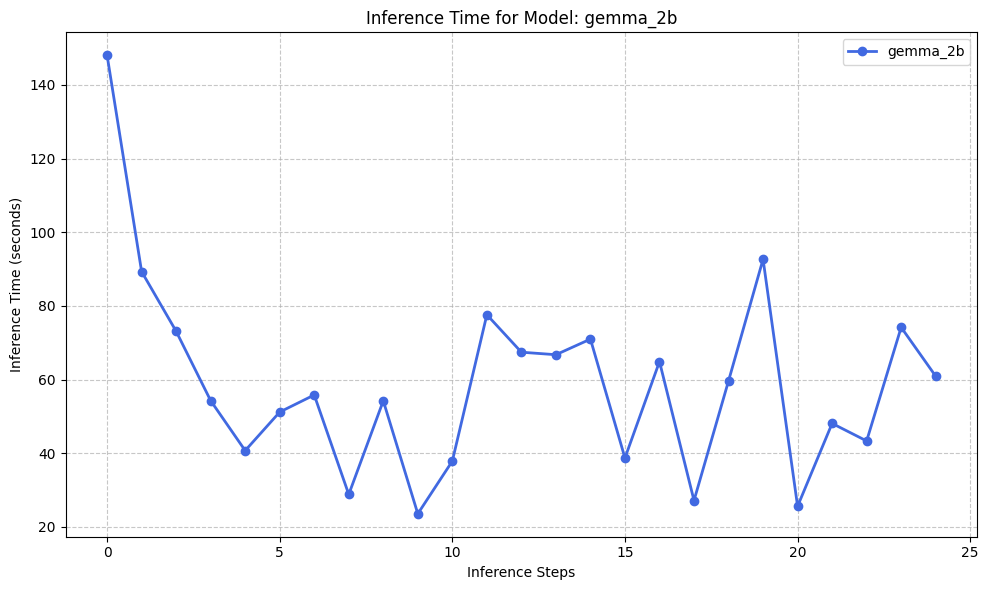

/gdrive/MyDrive/Tesi_magistrale/inference_time/phi_int4_time_inference.csv
Index(['inference_time'], dtype='object')


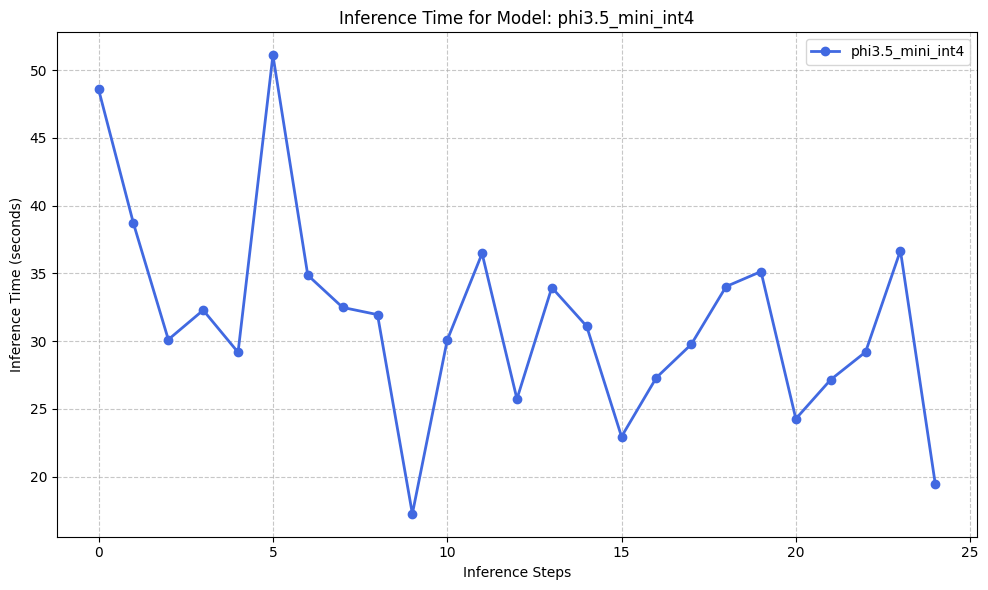

/gdrive/MyDrive/Tesi_magistrale/inference_time/phi_int8_time_inference.csv
Index(['inference_time'], dtype='object')


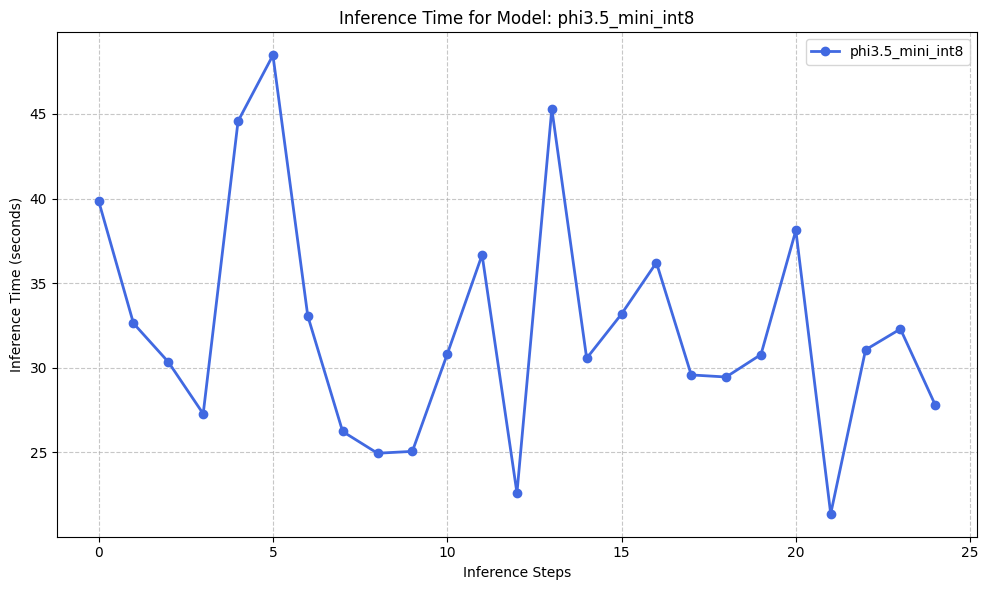

/gdrive/MyDrive/Tesi_magistrale/inference_time/qwen_0.5b_time_inference.csv
Index(['inference_time'], dtype='object')


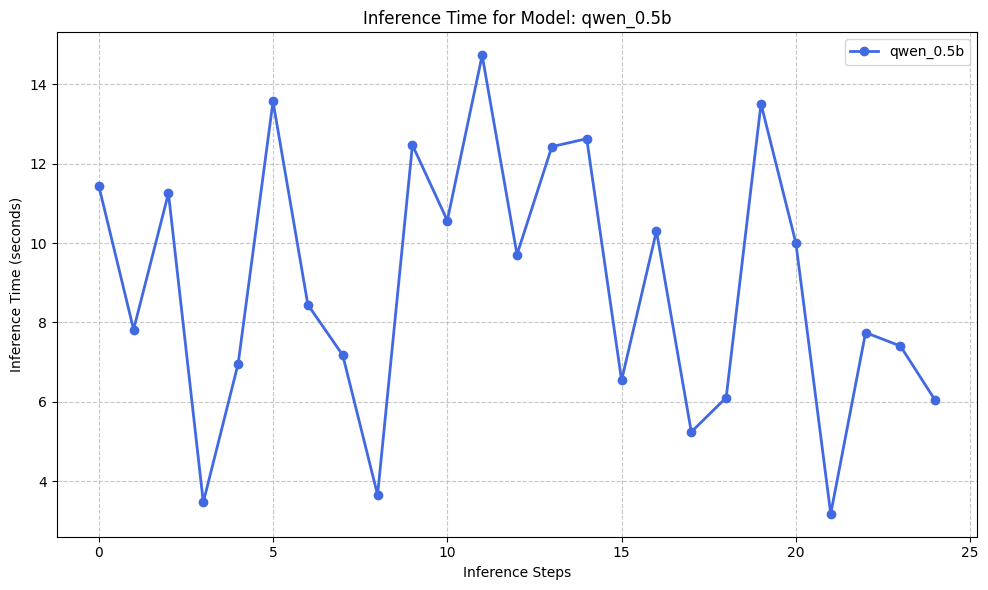

/gdrive/MyDrive/Tesi_magistrale/inference_time/qwen_1.5b_time_inference.csv
Index(['inference_time'], dtype='object')


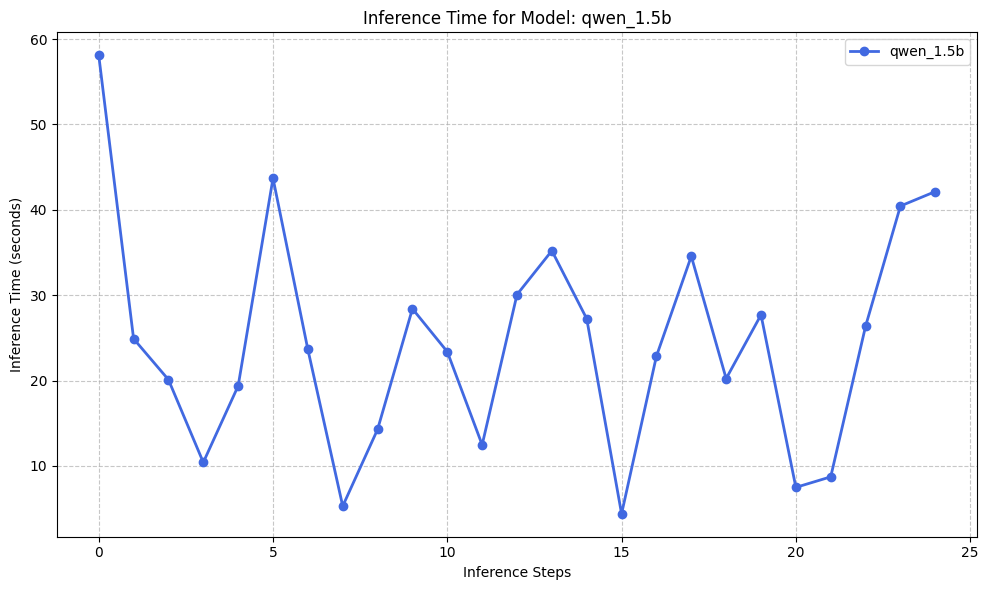

/gdrive/MyDrive/Tesi_magistrale/inference_time/qwen_3b_time_inference.csv
Index(['inference_time'], dtype='object')


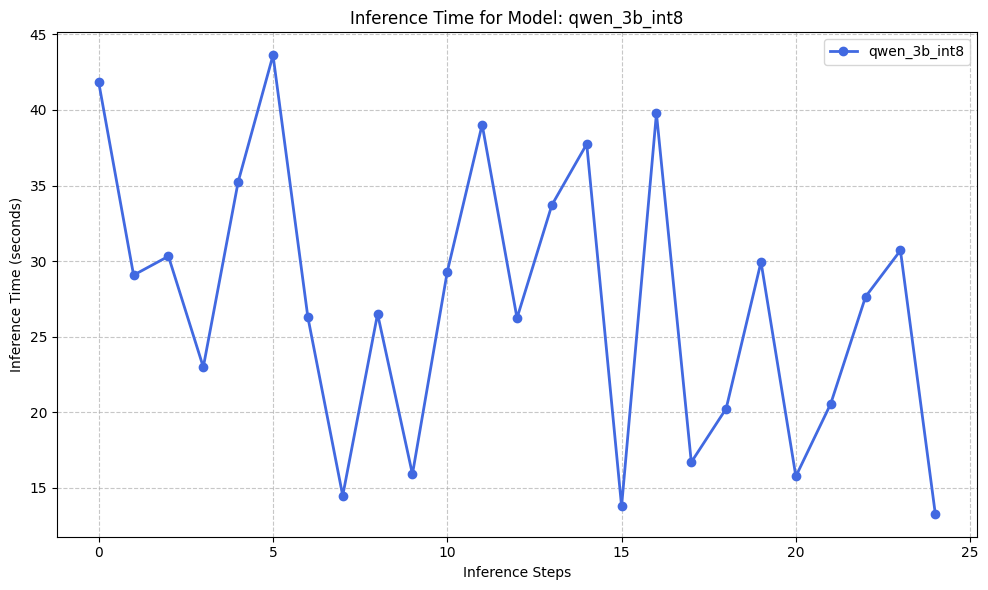

In [ ]:
for model_name, file_path in file_dict.items():
    print(file_path)
    data = pd.read_csv(file_path)
    print(data.columns)
    #print(data.head())
    # Initialize a plot for the current model
    plt.figure(figsize=(10, 6))

    # Plot the inference time for the current model with enhancements
    plt.plot(data['inference_time'], label=model_name, linewidth=2, marker='o', color='royalblue')

    # Set plot labels and title
    plt.xlabel("Inference Steps")
    plt.ylabel("Inference Time (seconds)")
    plt.title(f"Inference Time for Model: {model_name}")

    # Add gridlines for readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show legend
    plt.legend(loc='upper right')

    # Tight layout for better spacing
    plt.tight_layout()

    # Display the plot
    plt.show()


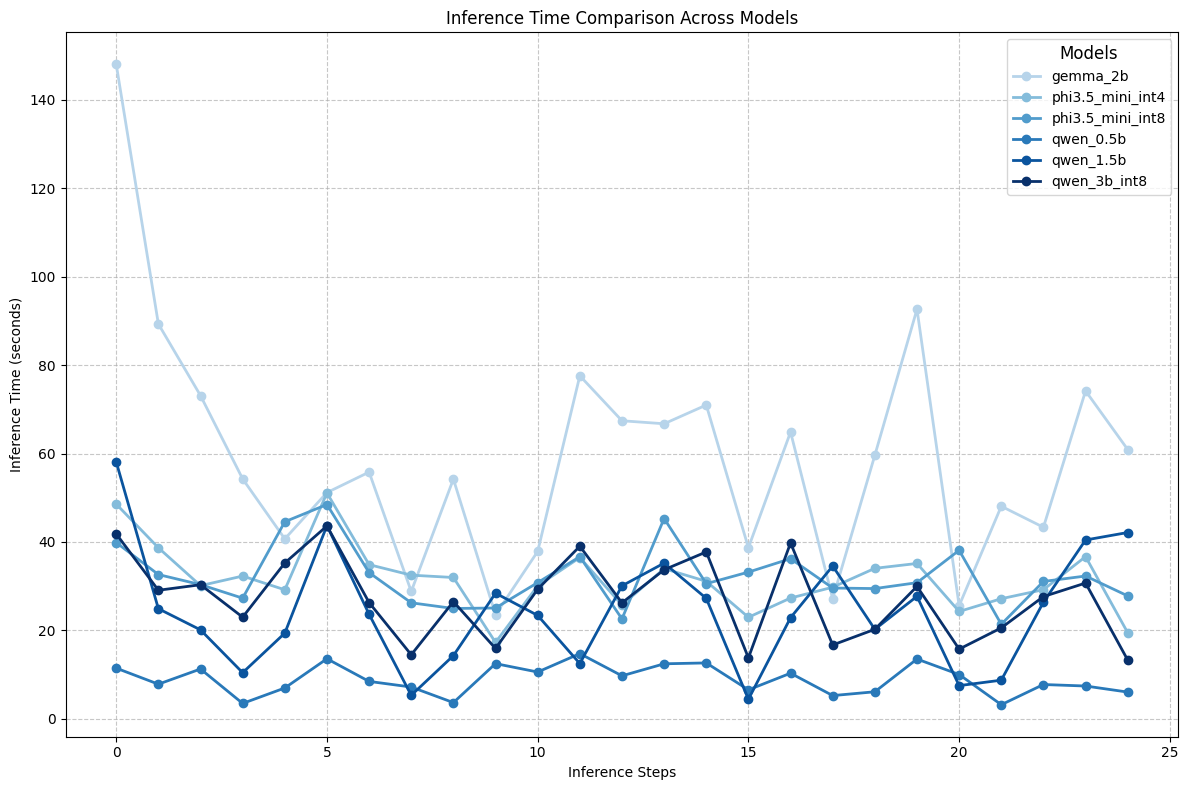

In [ ]:

import matplotlib.cm as cm

# Generate a blue gradient color map
colors = cm.Blues(np.linspace(0.3, 1, len(file_dict)))

# Initialize a plot
plt.figure(figsize=(12, 8))

# Load each file and plot inference time with model name as label
for (model_name, file_path), color in zip(file_dict.items(), colors):
    # Load the file
    data = pd.read_csv(file_path)

    # Plot inference time with the model name as label using gradient colors
    plt.plot(data['inference_time'], label=model_name, linewidth=2, marker='o', color=color)

# Set plot labels and title
plt.xlabel("Inference Steps")
plt.ylabel("Inference Time (seconds)")
plt.title("Inference Time Comparison Across Models")
# Add gridlines for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the legend for better readability
plt.legend(title="Models", fontsize='medium', title_fontsize='large', loc='upper right')
plt.tight_layout()

# Display the plot
plt.show()


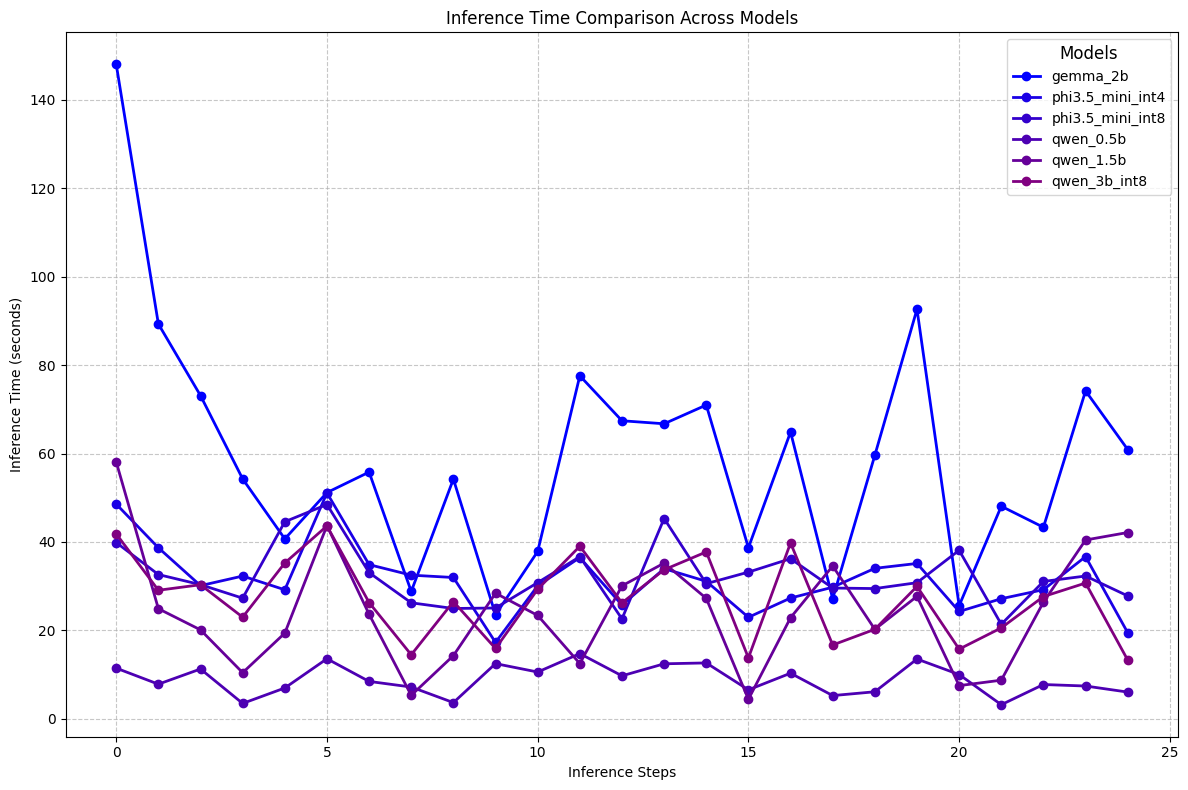

In [ ]:
import matplotlib.colors as mcolors

# Define a gradient from blue to purple
colors = list(mcolors.LinearSegmentedColormap.from_list("BluePurple", ["blue", "purple"])(np.linspace(0, 1, len(file_dict))))

# Initialize a plot
plt.figure(figsize=(12, 8))

# Load each file and plot inference time with model name as label
for (model_name, file_path), color in zip(file_dict.items(), colors):
    # Load the file, treating the first unnamed column as inference time
    data = pd.read_csv(file_path)

    # Plot inference time with the model name as label using gradient colors
    plt.plot(data['inference_time'], label=model_name, linewidth=2, marker='o', color=color)

# Set plot labels and title
plt.xlabel("Inference Steps")
plt.ylabel("Inference Time (seconds)")
plt.title("Inference Time Comparison Across Models")

# Add gridlines for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the legend for better readability
plt.legend(title="Models", fontsize='medium', title_fontsize='large', loc='upper right')
plt.tight_layout()

# Display the plot
plt.show()
